In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


In [ ]:
rimOne_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly'
train_glaucoma_dir = rimOne_dir + "/training_set/glaucoma"
train_normal_dir = rimOne_dir + "/training_set/normal"
test_glaucoma_dir = rimOne_dir + "/test_set/glaucoma"
test_normal_dir = rimOne_dir + "/test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")


Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-5-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


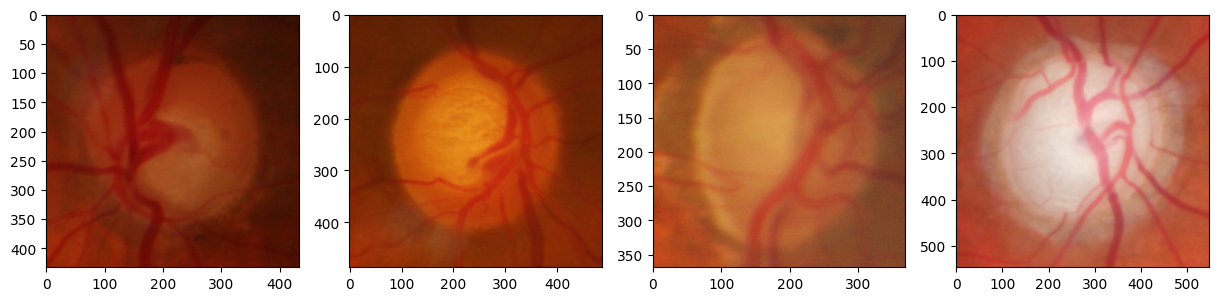


Sample Rim-One normal images:


<ipython-input-5-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


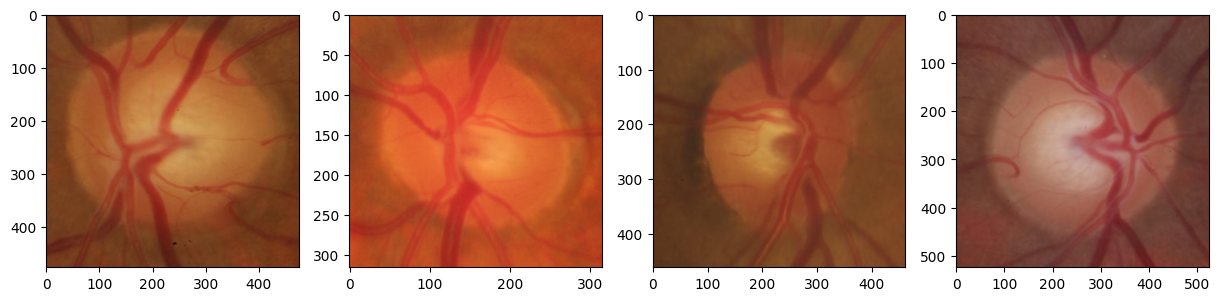

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

In [ ]:
dristhi_dir = "/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS"
train_glaucoma_dir = dristhi_dir + "/Training/Images/GLAUCOMA"
train_normal_dir = dristhi_dir + "/Training/Images/NORMAL"
test_glaucoma_dir = dristhi_dir + "/Test/Images/glaucoma"
test_normal_dir = dristhi_dir + "/Test/Images/normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")


Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-7-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


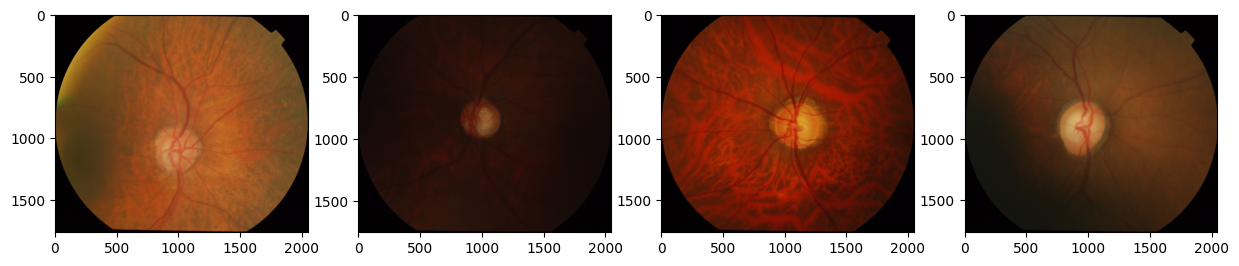


Sample Dristhi normal images:


<ipython-input-7-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


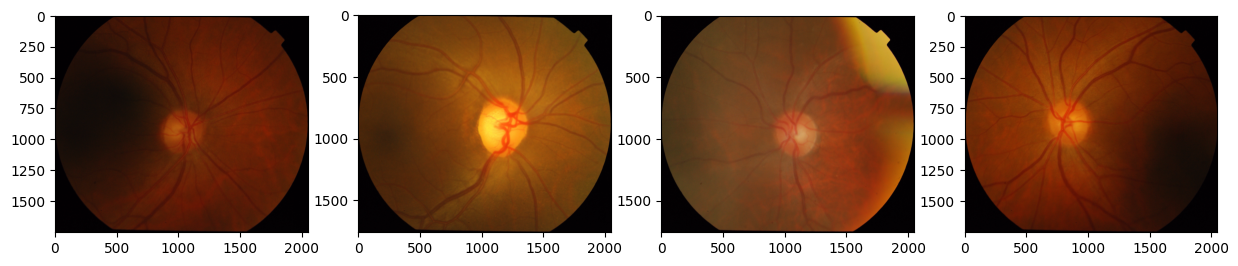

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

In [ ]:
acrima_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images'
glaucoma_dir = acrima_dir + "/glaucoma"
normal_dir = acrima_dir + "/normal"

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


<ipython-input-9-ea888e79ac72>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


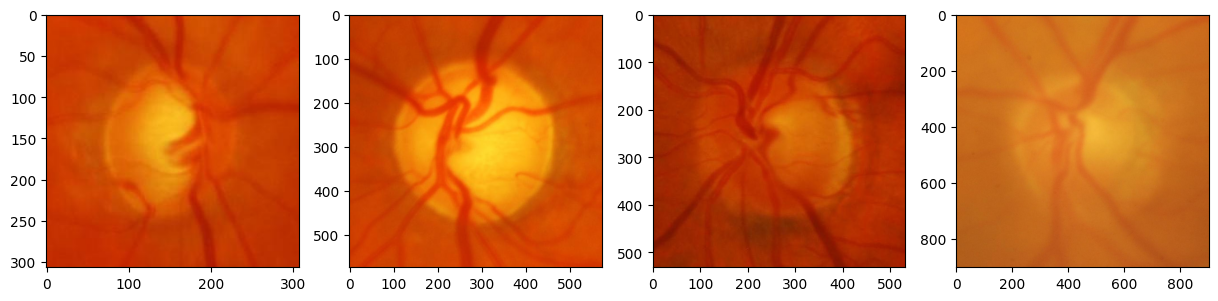


Sample normal images:


<ipython-input-9-ea888e79ac72>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


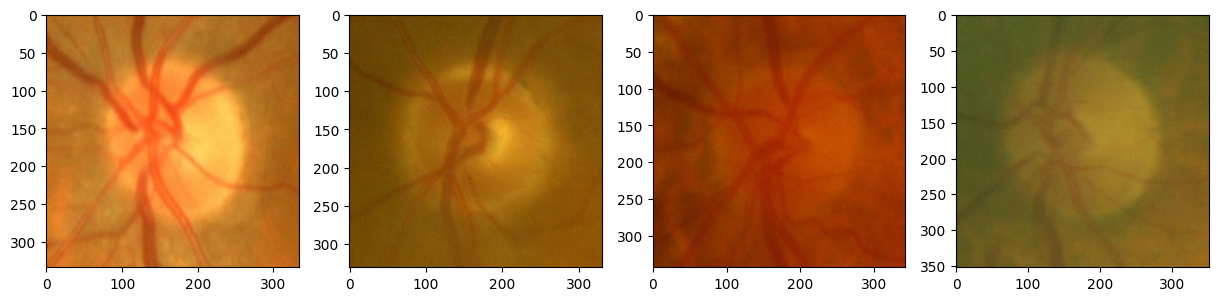

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

In [ ]:
os.mkdir('/content/drive/MyDrive/Glaucoma-Detection-Final/combine')
## define your paths for glaucoma####
g_path1 = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images/glaucoma'
g_path2 = '/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
g_path3 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
g_path4 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Training/Images/GLAUCOMA'
g_path5 ='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Test/Images/glaucoma'
g_dest='/content/drive/MyDrive/Glaucoma-Detection-Final/combine/glaucoma'

os.mkdir(g_dest)
g_list=[g_path1,g_path2,g_path3,g_path4,g_path5]

for i in g_list:
  shutil.copytree(i, g_dest, dirs_exist_ok=True)
print(len(os.listdir('/content/drive/MyDrive/Glaucoma-Detection-Final/combine/glaucoma')))

##################################################
#normal
n_path1='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images/normal'
n_path2='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
n_path3='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
n_path4='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Training/Images/NORMAL'
n_path5='/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Test/Images/normal'
n_dest='/content/drive/MyDrive/Glaucoma-Detection-Final/combine/normal'
os.mkdir(n_dest)
n_list=[n_path1,n_path2,n_path3,n_path4,n_path5]

for i in n_list:
  shutil.copytree(i,n_dest, dirs_exist_ok=True)
print(len(os.listdir(n_dest)))

638
653


In [ ]:
import pathlib

Total images: 1289
Total number of classes: 2
Total glaucoma images: 638
Total normal images: 653


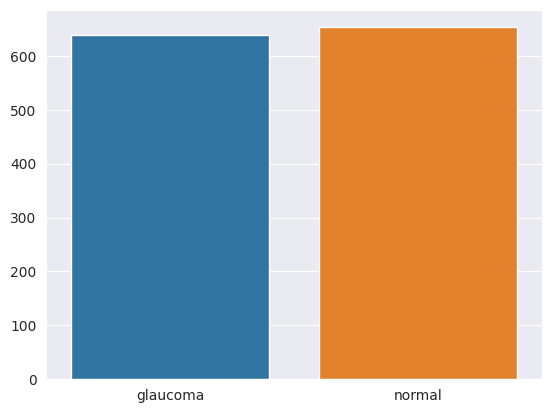

In [ ]:
base_dir = '/content/drive/MyDrive/Glaucoma-Detection-Final/combine'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma-Detection-Final/combine/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma-Detection-Final/combine/normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

In [ ]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/Glaucoma-Detection-Final/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=16
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.75,.1,.1), group_prefix=None)

Copying files: 1291 files [00:20, 63.81 files/s] 


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialising the CNN
classifier = Sequential()
# Step 1 - Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Step 2 - Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Set the learning rate
custom_optimizer = Adam(learning_rate=0.003)

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               6

In [ ]:
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 120,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/150
32/32 [==============================] - 50s 1s/step - loss: 1.3405 - accuracy: 0.4690 - val_loss: 0.7113 - val_accuracy: 0.4922
Epoch 2/150
32/32 [==============================] - 35s 1s/step - loss: 1.1248 - accuracy: 0.4310 - val_loss: 6.1195 - val_accuracy: 0.5000
Epoch 3/150
32/32 [==============================] - 36s 1s/step - loss: 0.9561 - accuracy: 0.4970 - val_loss: 1.2250 - val_accuracy: 0.4531
Epoch 4/150
32/32 [==============================] - 33s 1s/step - loss: 0.8756 - accuracy: 0.5360 - val_loss: 3.9977 - val_accuracy: 0.5000
Epoch 5/150
32/32 [==============================] - 33s 1s/step - loss: 0.8186 - accuracy: 0.5500 - val_loss: 1.1227 - val_accuracy: 0.4688
Epoch 6/150
32/32 [==============================] - 33s 1s/step - loss: 0.7374 - accuracy: 0.6060 - val_loss: 3.1005 - val_accuracy: 0.4922
Epoch 7/150
32/32 [==============================] - 33s 1s/step - loss: 0.7709 - accuracy: 0.5371 - val_loss: 0.8612 - val_accuracy: 0.5000
Epoch 8/150
3

In [ ]:
classifier.save('/content/drive/MyDrive/Glaucoma-Detection-Final/datasets/combine_model/combine_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


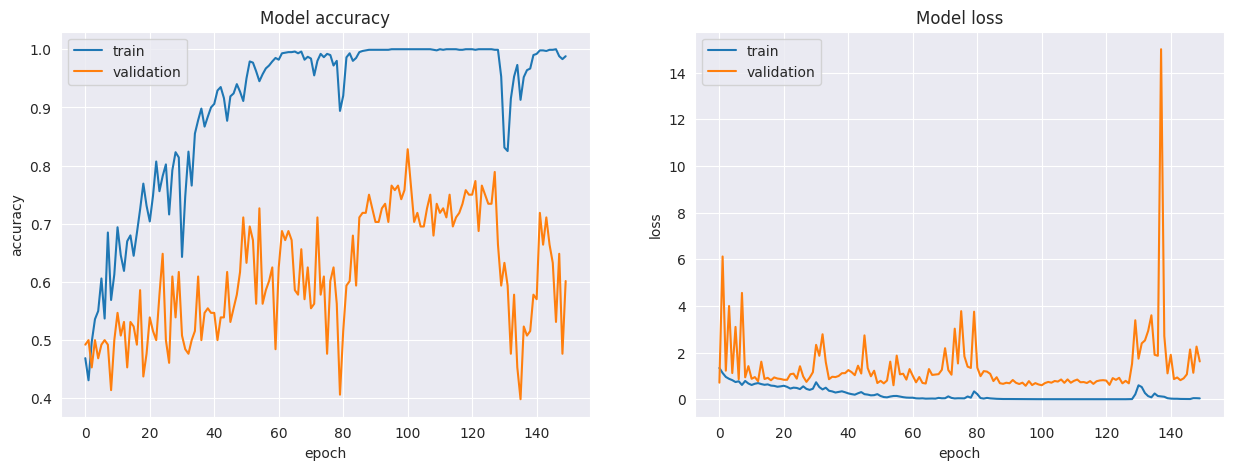

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

In [ ]:
model=load_model('/content/drive/MyDrive/Glaucoma-Detection-Final/datasets/combine_model/combine_cnn.h5')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


In [ ]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma/r2_Im287.png', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 60ms/step
Not Glaucoma


In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/ACRIMA/Images/glaucoma/Im310_g_ACRIMA.jpg', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 32ms/step
Not Glaucoma


In [ ]:
test_image = load_img('/content/drive/MyDrive/Glaucoma-Detection-Final/dataset/Drishti-GS/Training/Images/GLAUCOMA/drishtiGS_004.png', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 35ms/step
Not Glaucoma


In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 4s 786ms/step - loss: 1.4970 - accuracy: 0.6260
Loss: 1.4969547986984253 Accuracy: 0.6259542107582092
